# Project 4

Background: 

FIFA is the governing body of world football. Every year, a digital video game is released by FIFA and EASports. In this project, I will use the statistical information of football players from around the world in the game FIFA 18 (which is updated for the season that starts in 2017 and ends in 2018).The data is scraped from the website https://sofifa.com by extracting the Player personal data and Player Ids and then the playing and style statistics. 

The dataset is taken from kaggle under the link https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset/data by kevinH.

Assumptions:
1 - Assuming that the numeric figures given for each footballer is done objectively by FIFA
2 - Many columns do not have indepth explaination and I will make relevant assumptions if using them.

Problem Statement : 
To predict the overall score of footballers using various attributes from FIFA18 stats.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
fifa = pd.read_csv('./data/data.csv', encoding='utf-8')

# EDA

In [4]:
fifa.shape
# The dataset contains data from 17994 footballers in FIFA 18.

(17994, 185)

In [5]:
fifa.head(5)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [6]:
fifa.dtypes

ID                                int64
name                             object
full_name                        object
club                             object
club_logo                        object
special                           int64
age                               int64
league                           object
birth_date                       object
height_cm                       float64
weight_kg                       float64
body_type                        object
real_face                          bool
flag                             object
nationality                      object
photo                            object
eur_value                       float64
eur_wage                        float64
eur_release_clause              float64
overall                           int64
potential                         int64
pac                               int64
sho                               int64
pas                               int64
dri                               int64


In [7]:
fifa.describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,1.650000e+04,17994.000000,17994.000000,...,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,2021.000000
mean,207791.796543,1594.417306,25.120151,181.271980,75.400856,2.370511e+06,11503.834612,4.449111e+06,66.253029,71.200400,...,55.553747,56.990985,57.710574,58.216115,59.042384,59.262819,58.515244,56.871220,55.553747,64.714003
std,32328.527723,271.587232,4.617428,6.690392,6.994824,5.347250e+06,23050.661073,1.055955e+07,6.946729,6.082015,...,12.183008,9.773546,9.119380,9.162295,9.898161,9.845668,8.844482,10.285525,12.183008,7.661938
min,16.000000,728.000000,16.000000,155.000000,49.000000,0.000000e+00,0.000000,1.300000e+04,46.000000,46.000000,...,25.000000,30.000000,31.000000,31.000000,27.000000,27.000000,30.000000,26.000000,25.000000,46.000000
25%,192621.250000,1450.250000,21.000000,177.000000,70.000000,3.000000e+05,2000.000000,5.280000e+05,62.000000,67.000000,...,45.000000,50.000000,51.000000,52.000000,53.000000,53.000000,53.000000,49.000000,45.000000,59.000000
50%,214186.000000,1634.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000,1.200000e+06,66.000000,71.000000,...,57.000000,58.000000,58.000000,59.000000,60.000000,60.000000,59.000000,58.000000,57.000000,65.000000
75%,231615.750000,1785.000000,28.000000,186.000000,80.000000,2.000000e+06,12000.000000,3.600000e+06,71.000000,75.000000,...,65.000000,64.000000,64.000000,65.000000,66.000000,66.000000,65.000000,65.000000,65.000000,70.000000
max,241489.000000,2291.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000,2.368000e+08,94.000000,94.000000,...,87.000000,84.000000,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000


In [8]:
#Not using columns from 28 to 185, streamlining the dataframe by dropping not used columns.

for num in range (28,185):
    for number in range(28,185):
        fifa.drop(fifa.columns[number],axis=1,inplace=True)
        break
        

In [9]:
fifa.isnull().sum()
#Null values exist for players who have no clubs. 
#As they are still registered FIFA players, not necessary to drop them or replace the null value.

ID                             0
name                           0
full_name                      0
club                         253
club_logo                    253
special                        0
age                            0
league                       253
birth_date                     0
height_cm                      0
weight_kg                      0
body_type                      0
real_face                      0
flag                           0
nationality                    0
photo                          0
eur_value                      0
eur_wage                       0
eur_release_clause          1494
overall                        0
potential                      0
pac                            0
sho                            0
pas                            0
dri                            0
def                            0
phy                            0
international_reputation       0
dtype: int64

# Line plot for overall score of players

In [10]:
#Count the number of players having an overall score.
#Overall score is a stats given by FIFA on the overall value of players.

fifa.overall.value_counts().sort_index()

46      12
47      14
48      22
49      45
50     110
51     138
52     170
53     231
54     234
55     263
56     316
57     377
58     446
59     517
60     697
61     689
62     825
63     919
64    1045
65    1034
66    1107
67    1083
68    1049
69     924
70     902
71     824
72     743
73     677
74     569
75     460
76     364
77     300
78     195
79     169
80     133
81      94
82      99
83      71
84      33
85      25
86      23
87      13
88      14
89       8
90       5
91       1
92       3
93       1
94       1
Name: overall, dtype: int64

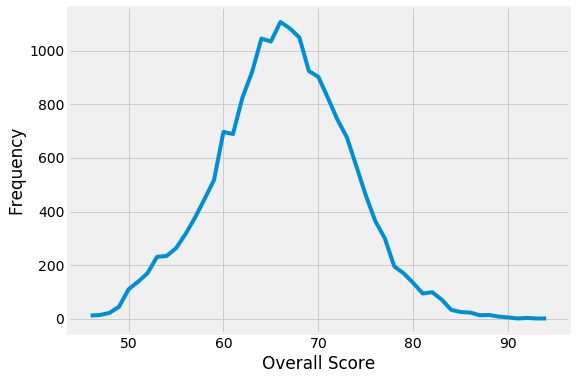

In [11]:
fifa.overall.value_counts().sort_index().plot();
plt.xlabel('Overall Score');
plt.ylabel('Frequency');

In [12]:
fifa.overall.describe()
#the top 75% has a minimium overall score of 71

count    17994.000000
mean        66.253029
std          6.946729
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

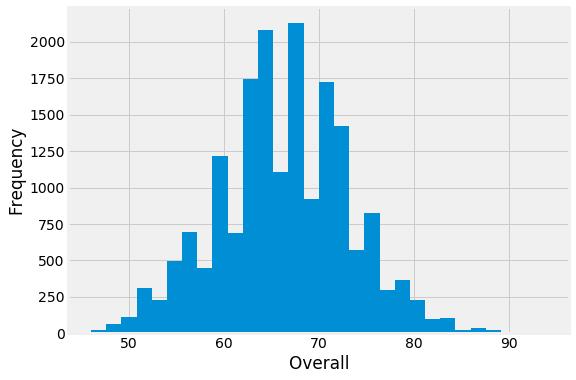

In [13]:
fifa.overall.plot(kind='hist', bins=30);
plt.xlabel('Overall');
plt.ylabel('Frequency');

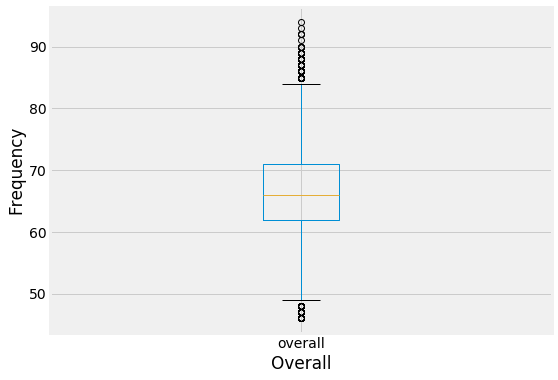

In [14]:
fifa.overall.plot(kind='box');
plt.xlabel('Overall');
plt.ylabel('Frequency');

In [15]:
fifa.groupby('league').overall.describe()
#Showing the overall count for 31 leagues around the world.
# English Premier league has 654 players and an overall mean score of 72.4
# Spanish Primera Division has 602 players and an overall mean score of 73.7
# German Bundesliga has 537 players and an overall mean score of 72.4
# Italian Seria A has 559 players and an overall mean score of 72.6
# French Liga 1 has 598 players and an overalll mean score of 70.5


,count,mean,std,min,25%,50%,75%,max
league,,,,,,,,
Argentinian Superliga,780.0,66.043590,5.516752,49.0,62.00,66.0,70.00,81.0
Australian A-League,236.0,62.724576,6.064581,50.0,59.00,63.0,67.00,76.0
Austrian Bundesliga,259.0,63.065637,5.187150,47.0,60.00,64.0,66.00,76.0
Belgian First Division A,436.0,67.403670,5.230537,55.0,64.00,68.0,71.00,79.0
Campeonato Brasileiro Série A,320.0,70.496875,3.606854,62.0,68.00,71.0,73.00,77.0
Chilian Primera División,320.0,70.478125,3.612867,62.0,68.00,71.0,73.00,77.0
Colombian Primera A,552.0,64.601449,5.449707,49.0,62.00,65.0,68.00,78.0
Czech Liga,28.0,70.035714,3.863237,62.0,67.75,70.0,73.00,79.0
Danish Superliga,365.0,62.123288,6.445770,50.0,57.00,63.0,67.00,75.0


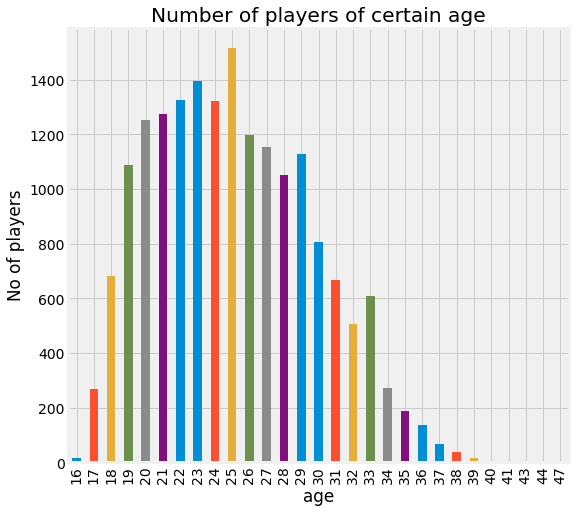

In [16]:
# Just FYI on the distribution of players and age across all leagues.

fifa.age.value_counts().sort_index().plot(kind='bar', figsize=(8,8));     # Bigger plot by increasing age
plt.xlabel('age');
plt.ylabel('No of players');
plt.title('Number of players of certain age');

In [17]:
fifa_top25 = fifa[fifa.overall >= 71].groupby('league').overall.agg(['count', 'mean'])
fifa_top25['count'].sort_values(ascending=False)
# Footballs in the top 25 percent will have an overall score of 71 and above. 
#Calculating the number of top level players in each of the leagues.

league
English Premier League           435
Spanish Primera División         430
Italian Serie A                  367
German Bundesliga                361
French Ligue 1                   330
English Championship             229
Turkish Süper Lig                226
Portuguese Primeira Liga         222
Mexican Liga MX                  183
Argentinian Superliga            179
Campeonato Brasileiro Série A    171
Chilian Primera División         170
Russian Premier League           164
Spanish Segunda División         150
USA Major League Soccer          134
Belgian First Division A         131
Holland Eredivisie               126
German 2. Bundesliga              90
Italian Serie B                   73
Greek Super League                72
Colombian Primera A               67
French Ligue 2                    52
Saudi Professional League         47
Swiss Super League                40
Japanese J1 League                38
Korean K League Classic           37
Scottish Premiership           

In [18]:
# Just FYI
#For the clubs with top players (top 25 percent with min score of 71)

fifa_top25_club = fifa[fifa.overall >= 71].groupby('club').overall.agg(['count', 'mean'])
fifa_top25_club['mean'].sort_values(ascending=False)

club
FC Bayern Munich               84.200000
FC Barcelona                   83.304348
Real Madrid CF                 83.000000
Juventus                       82.708333
Atlético Madrid                82.380952
Manchester City                82.000000
Chelsea                        82.000000
Paris Saint-Germain            81.909091
Tottenham Hotspur              81.700000
Manchester United              81.346154
Arsenal                        80.875000
Borussia Dortmund              80.480000
Liverpool                      80.285714
Roma                           79.652174
Napoli                         79.200000
Inter                          79.000000
Everton                        78.708333
Sevilla FC                     78.652174
Villarreal CF                  78.545455
FC Porto                       78.521739
Milan                          78.434783
Real Sociedad                  78.300000
Lazio                          78.285714
AS Monaco                      78.260870
West Ham Un

# Listing variables that can be used as predictors of Overall score

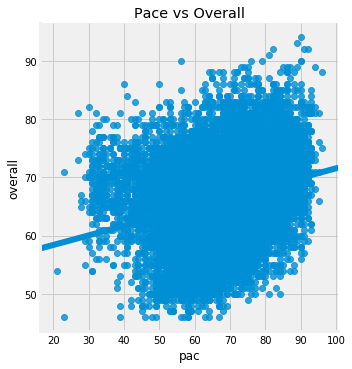

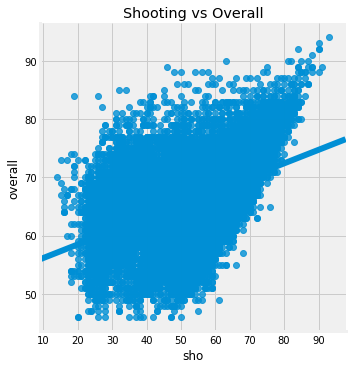

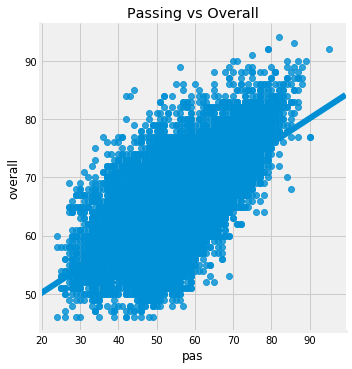

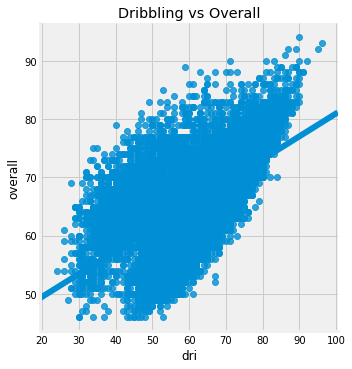

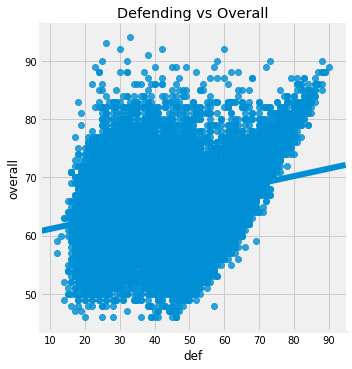

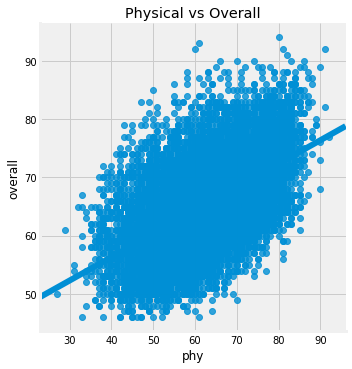

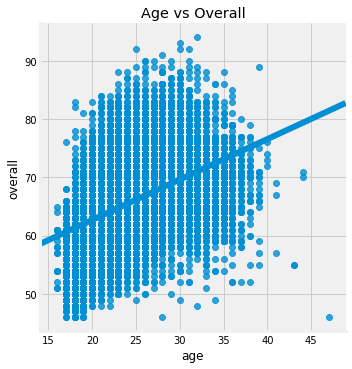

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#FIFA dataset as some data such as  
#PAC = PACE
#SHO = SHOOTING, players who can finish chances from both inside and outside the box, as well as get into good positions, have a higher shooting stat.
#PAS = PASSING
#DRI = DRIBBLING , a good dribbler needs great technical stats, but also needs the agility, balance and reactions to be responsive and deadly in game
#DEF = DEFENDING
#PHY = PHYSICAL
#Age

sns.lmplot(x='pac', y='overall', data=fifa)
plt.title('Pace vs Overall')
plt.show()


sns.lmplot(x='sho', y='overall', data=fifa)
plt.title('Shooting vs Overall')
plt.show()

sns.lmplot(x='pas', y='overall', data=fifa)
plt.title('Passing vs Overall')
plt.show()
sns.lmplot(x='dri', y='overall', data=fifa)
plt.title('Dribbling vs Overall')
plt.show()
sns.lmplot(x='def', y='overall', data=fifa)
plt.title('Defending vs Overall')
plt.show()
sns.lmplot(x='phy', y='overall', data=fifa)
plt.title('Physical vs Overall')
plt.show()

sns.lmplot(x='age', y='overall', data=fifa)
plt.title('Age vs Overall')
plt.show()

          overall       pac       sho       pas       dri       def       phy  \
overall  1.000000  0.258982  0.461622  0.643841  0.587780  0.319160  0.557634   
pac      0.258982  1.000000  0.345504  0.301431  0.567603 -0.237660 -0.090270   
sho      0.461622  0.345504  1.000000  0.649777  0.764195 -0.451156  0.017722   
pas      0.643841  0.301431  0.649777  1.000000  0.805737  0.083005  0.145766   
dri      0.587780  0.567603  0.764195  0.805737  1.000000 -0.215471 -0.006285   
def      0.319160 -0.237660 -0.451156  0.083005 -0.215471  1.000000  0.534502   
phy      0.557634 -0.090270  0.017722  0.145766 -0.006285  0.534502  1.000000   
age      0.460902 -0.134239  0.249261  0.338839  0.180305  0.225940  0.420088   

              age  
overall  0.460902  
pac     -0.134239  
sho      0.249261  
pas      0.338839  
dri      0.180305  
def      0.225940  
phy      0.420088  
age      1.000000  


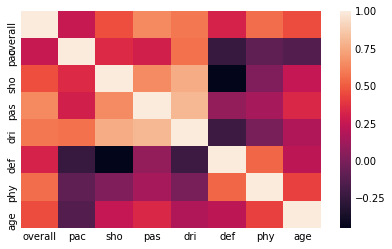

In [20]:

#feature_cols = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']
data = ['overall','pac', 'sho', 'pas', 'dri', 'def', 'phy', 'age']
data2 = fifa[data]
corr = data2.corr()
# Visualize correlation matrix in Seaborn using a heat map.

print(corr)
sns.heatmap(corr)

In [21]:
#Observations
#1. Shooting and Defending has negative correlations
#2. Shooting and Dribbling has very high correlations
#3. Overall has increasing correlations with the factors in the following order:
#    Pace (lowest), Defending, Shooting, Physical, Dribbling, Passing (highest)


# Building a Simple Linear Regression Model

In [22]:
feature_cols = ['pac', 'sho', 'pas', 'dri', 'def', 'phy', 'age']
X = fifa[feature_cols] 
y = fifa.overall

In [23]:
print((X.shape))

(17994, 7)


# 1. Evaluating using Train Test Split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train-test split from model selection
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state =8 )
lr = LinearRegression()


C:\Users\D\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
print(X_train.shape)
print(X_test.shape)

(12595, 7)
(5399, 7)


In [26]:
model = lr.fit(X_train,y_train) # We then fit the model  
predictions = lr.predict(X_test) # and make predictions based on the X_test
lr.score(X_test, y_test)

0.7155657323475728

In [27]:
#testing model on testing set and check accuracy
print( 'MSE for Train set:{}'.format(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print( 'MSE for Test set :{}'.format(metrics.mean_squared_error(y_test, predictions)))

MSE for Train set:13.393103274819802
MSE for Test set :13.801348448376618


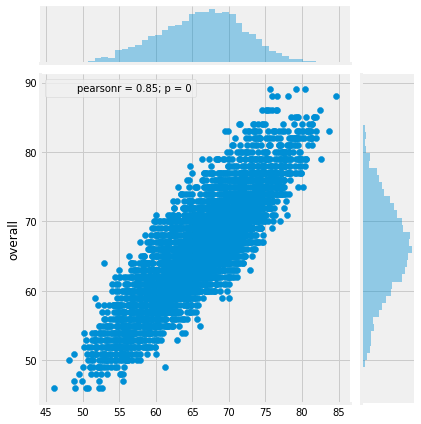

In [28]:
sns.jointplot(predictions, y_test);

In [29]:
# ----- Additional Info -----
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

12.830577897673606
[0.03974802 0.09129221 0.05293792 0.26317163 0.1114363  0.25524342
 0.17130133]


In [30]:
# Pair the feature names with the coefficients.
#Display the linear regression coefficient along with the feature names.
list(zip(feature_cols, lr.coef_))

[('pac', 0.039748020749700096),
 ('sho', 0.0912922079868712),
 ('pas', 0.05293792252243829),
 ('dri', 0.26317163417356654),
 ('def', 0.11143629820527194),
 ('phy', 0.2552434154521407),
 ('age', 0.17130133163054845)]

# 2. Evaluating using K Fold Cross Validation

In [31]:
# To prevent Overfitting, doing Cross Validation on Model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

for folds in range(5,11):
    lr = LinearRegression() 
    scores = cross_val_score(lr, X, y, cv=folds)
    
    # For every time (k) we cross-validate the model (which is also being fit in that same step)
    print("{} Cross-validated scores:     {}".format(folds, scores)) 
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds) # and its predictions
    accuracy = metrics.r2_score(y, predictions) # comparing r2 of the predicted values vs. our actual values.
    mse_value = metrics.mean_squared_error(y, predictions)
    
    print("{} Cross-Predicted Accuracy R2: {}".format(folds, accuracy))
    print("{} MSE :                        {}".format(folds, mse_value))
    
     # Extra space for printing
    print ("")

5 Cross-validated scores:     [ -2.28177003  -7.08122258 -10.33278996  -8.10362735  -1.84551619]
5 Cross-Predicted Accuracy R2: 0.569538041201983
5 MSE :                        20.771666471858907

6 Cross-validated scores:     [ -2.49157308  -9.34180914 -13.23694967 -16.24570082  -9.05014741
  -2.04602576]
6 Cross-Predicted Accuracy R2: 0.6028499830101373
6 MSE :                        19.16422002827287

7 Cross-validated scores:     [ -2.81478016 -12.12023213 -17.24340964 -21.05406072 -19.05628677
  -9.77867948  -2.36864732]
7 Cross-Predicted Accuracy R2: 0.6228306100507834
7 MSE :                        18.200067651264213

8 Cross-validated scores:     [ -2.91332892 -13.15125106 -18.40756457 -25.33798765 -22.38066659
 -19.29518233  -9.44661954  -2.71312844]
8 Cross-Predicted Accuracy R2: 0.6388535353072164
8 MSE :                        17.426891642263335

9 Cross-validated scores:     [ -3.20138413 -20.98467008 -23.93465213 -23.09942675 -31.88433243
 -40.61873983 -22.6944667  -10.51

Text(0,0.5,'Predictions')

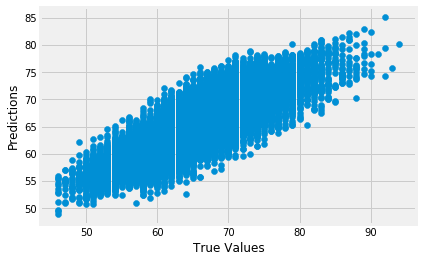

In [32]:
#Plotting scatter plot based on 10 fold cross validation results
predictions2 = cross_val_predict(model,X, y, cv=10)
plt.scatter(y, predictions2)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Conclusion

In [33]:
#--- R2 ----
#R-squared or coefficient of determination which is the proportion of variance in the dependent variable
#that can be explained by the independent variable.
#The Train Test Split acccuracy is 0.71 while that done from 10 fold cross validation is 0.66. 
#With a range of 0 to 1, a score of approx 0.66 shows that the model has a moderate accuracy.

#-----MSE-----
#Mean Squared Error is the mean value of the squared deviations of the predictions from the true values.
#over an out-of sample test space, generated by a model estimated over a particular sample space.
#lesser MSE - smaller error - better estimator as closer to line of best fit

# The MSE error obtained for Train Test Split model is about 13.8 (test set)
# The MSE error obtained via the 5 fold cross validation model is about 20.7 
# The MSE error obtained via the 10 fold cross validation model is about 16.5

#The MSE is still rather high. Will consider adding more variables to make th model more accurate.


# World Cup Trivia

In [34]:
# Some trivia knowledge generated after the world cup. 
#Overall scores of the Final 4 teams starting lineups.

worldcup = pd.read_csv('./data/WC1.csv')

In [35]:
worldcup.head(45)

,Id,Name,Club,Overall,Country,Unnamed: 5
0,177003,Luka Modrić,Real Madrid CF,89,Croatia,NaN
1,168651,Ivan Rakitić,FC Barcelona,87,Croatia,NaN
2,192593,Danijel Subašić,AS Monaco,85,Croatia,NaN
3,181458,Ivan Perišić,Inter,84,Croatia,NaN
4,181783,Mario Mandžukić,Juventus,83,Croatia,NaN
5,216352,Marcelo Brozović,Inter,81,Croatia,NaN
6,195086,Dejan Lovren,Liverpool,81,Croatia,NaN
7,203890,Sime Vrsaljko,Atlético Madrid,80,Croatia,NaN
8,201139,Ivan Strinić,Sampdoria,75,Croatia,NaN
9,1,Domangoj Vida,Beskitas,75,Croatia,NaN


In [36]:
worldcup.groupby('Country').Overall.describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Belgium,11.0,84.727273,3.951985,78.0,82.5,85.0,87.5,90.0
Croatia,11.0,81.090909,5.318920,72.0,77.5,81.0,84.5,89.0
England,11.0,80.090909,3.477198,75.0,77.5,79.0,82.5,86.0
France,11.0,83.454545,4.740541,73.0,82.5,85.0,87.0,88.0


In [37]:
# From the mean generated,Belgium seems to have the strongest team with players with the higher overall scores, 
#followed by France, Croatia and England respectively.
# France Won the world cup though.